In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
comms = pd.read_csv("../data/rawdata/Twitter_dates.csv")
bayou = pd.read_csv("../data/rawdata/Twitter_watergauge.csv")

Twitter_water = pd.merge(comms, bayou, on="Dates")
Twitter_water

,Dates,Number of tweets,311 requests,Dairy Ashford rain,Beltway 8 rain,San Felipe rain,Shepherd rain,Milam rain
0,8/18/17,56,1249,0.00,0.00,0.00,0.00,0.00
1,8/19/17,3626,455,0.00,0.00,0.00,0.00,0.00
2,8/20/17,2328,300,0.00,0.00,0.04,0.00,0.00
3,8/21/17,1817,1248,0.00,0.00,0.00,0.00,0.00
4,8/22/17,4967,1335,0.00,0.00,0.00,0.00,0.00
5,8/23/17,18597,1276,0.04,0.00,0.00,0.00,0.00
6,8/24/17,146267,1215,0.00,0.00,0.00,0.20,1.40
7,8/25/17,573388,869,1.12,1.20,0.88,0.88,0.88
8,8/26/17,691781,1284,12.48,12.64,7.76,8.68,9.32
9,8/27/17,879337,1529,14.96,14.56,12.72,14.76,3.36


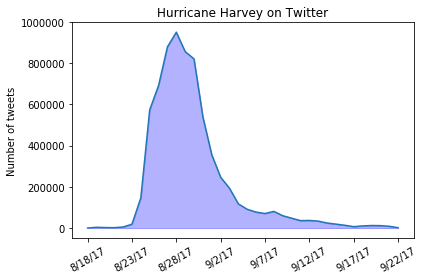

In [9]:
x = comms["Dates"]
y = comms["Number of tweets"]

plt.plot(x,y)

plt.fill_between(x,y, color="blue", alpha=.3)

plt.ylabel("Number of tweets")
plt.title("Hurricane Harvey on Twitter")

frequency = 5
plt.xticks(x[::frequency],rotation=30)

plt.tight_layout()
plt.savefig("../images/HurricaneHarveyTweets3.png")
plt.show()

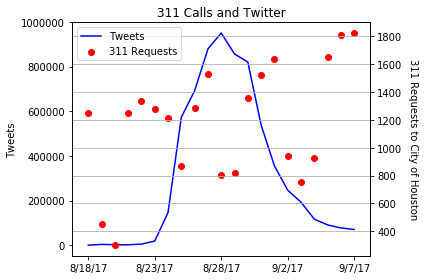

In [18]:
x = Twitter_water["Dates"]
y1 = Twitter_water["Number of tweets"]
y2 = Twitter_water["311 requests"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x, y1, color="blue", label="Tweets")
ax2.scatter(x, y2, color="red", label="311 Requests")

ax1.set_ylabel('Tweets')
ax2.set_ylabel('311 Requests to City of Houston',rotation=270,labelpad=15)

frequency = 5
plt.xticks(x[::frequency],rotation=45)

plt.title("311 Calls and Twitter")

# Create a legend

handles, labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
        
plt.legend(handles,labels)   
plt.grid()
plt.tight_layout()
plt.savefig("../images/SRandTwitter.png")
plt.show()

In [4]:
#Calculate the Total of Rainfall in Buffalo Bayou 
removetweets = list(Twitter_water)
removetweets.remove("Number of tweets")

rainfall = list(removetweets)
rainfall.remove("311 requests")
 
Twitter_water["Total_rainfall"] = Twitter_water[rainfall].sum(axis=1)
#Avg_rainfall = Twitter_water["Total_rainfall"] / (len(Twitter_water.columns) - 1)

Twitter_water

,Dates,Number of tweets,311 requests,Dairy Ashford rain,Beltway 8 rain,San Felipe rain,Shepherd rain,Milam rain,Total_rainfall
0,8/18/17,56,1249,0.00,0.00,0.00,0.00,0.00,0.00
1,8/19/17,3626,455,0.00,0.00,0.00,0.00,0.00,0.00
2,8/20/17,2328,300,0.00,0.00,0.04,0.00,0.00,0.04
3,8/21/17,1817,1248,0.00,0.00,0.00,0.00,0.00,0.00
4,8/22/17,4967,1335,0.00,0.00,0.00,0.00,0.00,0.00
5,8/23/17,18597,1276,0.04,0.00,0.00,0.00,0.00,0.04
6,8/24/17,146267,1215,0.00,0.00,0.00,0.20,1.40,1.60
7,8/25/17,573388,869,1.12,1.20,0.88,0.88,0.88,4.96
8,8/26/17,691781,1284,12.48,12.64,7.76,8.68,9.32,50.88
9,8/27/17,879337,1529,14.96,14.56,12.72,14.76,3.36,60.36


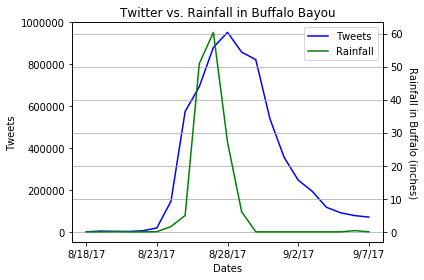

In [5]:
#Dual Axis Chart with Tweets and Buffalo rainfall from gauges

x = Twitter_water["Dates"]
y1 = Twitter_water["Number of tweets"]
y2 = Twitter_water["Total_rainfall"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x, y1, color="blue", label="Tweets")
ax2.plot(x, y2, color="green", label="Rainfall")

ax1.set_xlabel('Dates')
ax1.set_ylabel('Tweets')
ax2.set_ylabel('Rainfall in Buffalo (inches)',rotation=270,labelpad=15)

frequency = 5
plt.xticks(x[::frequency],rotation=45)

plt.title("Twitter vs. Rainfall in Buffalo Bayou")

# Create a legend

handles, labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
        
plt.legend(handles,labels)   
plt.grid()
plt.tight_layout()
plt.savefig("../images/TwittervsBuffalo1.png")
plt.show()